# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [ ]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
#1
import pandas as pd
url = 'https://raw.githubusercontent.com/thaonguyyen/visualization/main/assignment/data/airbnb_hw.csv'
df = pd.read_csv(url, low_memory=False)

#clean Price variable
price = df['Price']
price = price.str.replace(',','') #replace commas with nothing
price = pd.to_numeric(price,errors='coerce') #typecast price to float/numeric
df['Price'] = price
del price


In [ ]:
#2
print("Dimensions:", df.shape)
df.head()

Dimensions: (30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
print("Variables:", df.columns)

Variables: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [ ]:
#3
pd.crosstab(df['Property Type'], df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0




> There are many different types of properties available. The most common ones are apartments, houses, lofts, and townhouses. Apartments usually rent the whole space while houses only share a private room rather than entire property.



<Axes: xlabel='Price', ylabel='Count'>

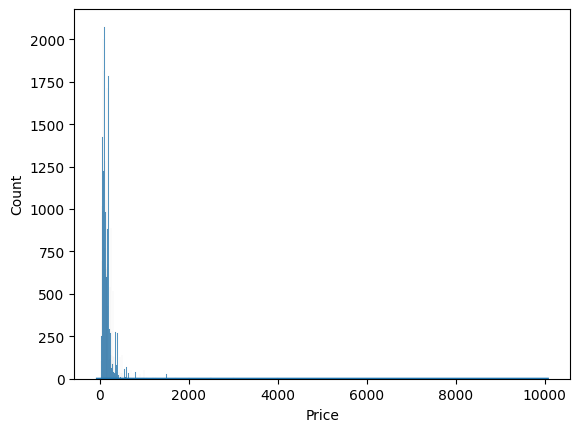

In [ ]:
#4
import seaborn as sns
sns.histplot(data=df, x='Price')

<Axes: xlabel='Price', ylabel='Density'>

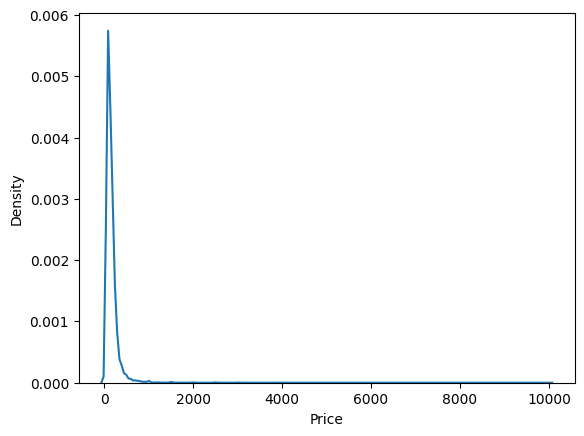

In [ ]:
sns.kdeplot(data=df, x='Price')

<Axes: xlabel='Price'>

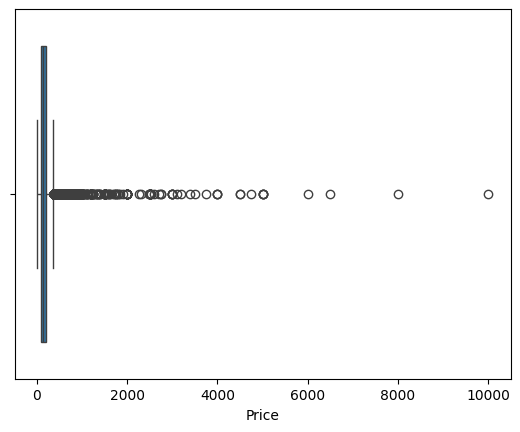

In [ ]:
sns.boxplot(data=df, x='Price')

In [ ]:
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [ ]:
import numpy as np
df['Price_log'] = np.log(df['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

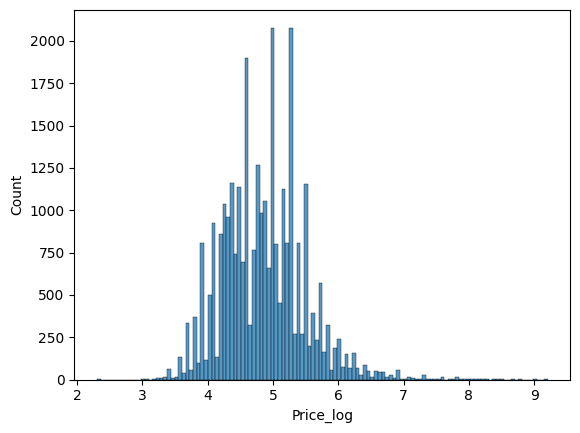

In [ ]:
sns.histplot(data=df, x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

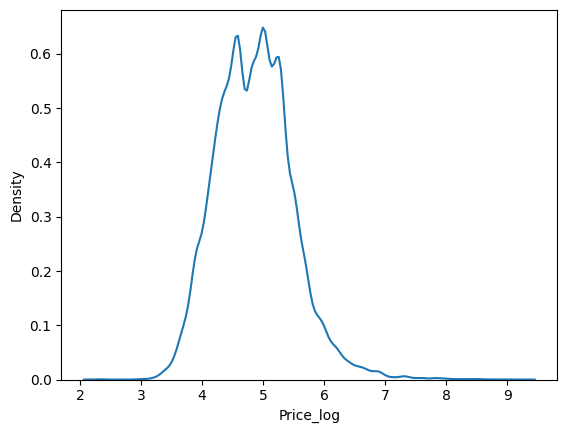

In [ ]:
sns.kdeplot(data=df, x='Price_log')

<Axes: xlabel='Price_log'>

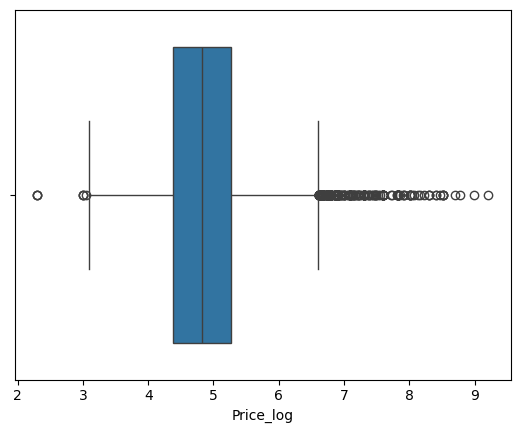

In [ ]:
sns.boxplot(data=df, x='Price_log')

In [ ]:
df['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

<Axes: xlabel='Beds', ylabel='Price_log'>

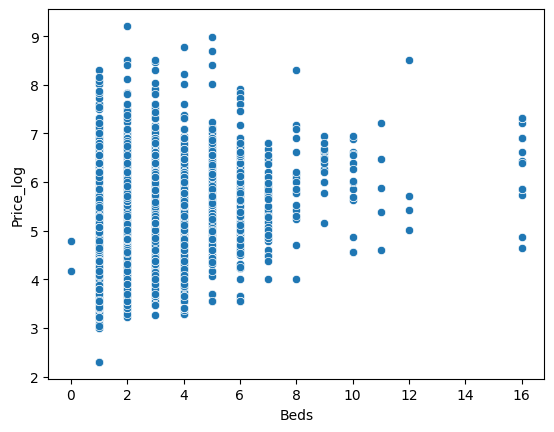

In [ ]:
#5
sns.scatterplot(data=df, x='Beds', y='Price_log')

In [ ]:
from pydoc import describe
df.loc[:,['Beds', 'Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0



> Overall, we can see that as the number of beds increases, the price also increases as they have a direct relationship. However, once we hit 6-16 number of beds, then the pattern is not as clear. Looking at these values, there are some outliers of properties with high prices. Also, the standard deviation increases until 6 beds then it varies.



<Axes: xlabel='Beds', ylabel='Price_log'>

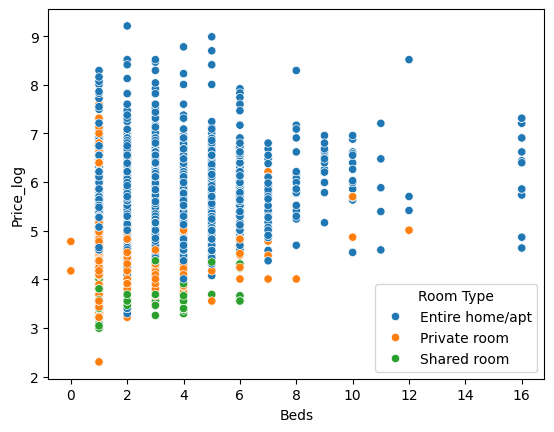

In [ ]:
#6
sns.scatterplot(data=df, x='Beds', y='Price_log', hue='Room Type')

In [ ]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [ ]:
var = 'Price'
group = 'Property Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0



> The shared and private rooms are generally the cheapest properties for any given number of beds and are also on the bottom of the scatterplot. Entire homes/apartment have the highest room price on average and villas have the highest property price average. Entire home/apartment have the highest standard deviation. The median appears to be a more reliable estimate of central tendency because the data is left-skewed.



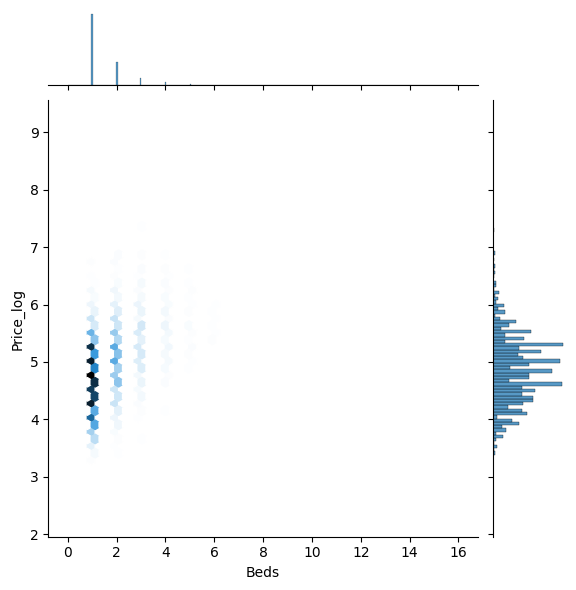

In [ ]:
#7
sns.jointplot(data=df, x='Beds', y='Price_log', kind='hex')



> Most properties have 1 or 2 beds and some have 3 or 4. Few have 5-16 beds overall. The majority of properties are within a price band of 2.5 to 6 log points or about 40 to 400. Even though there are outliers in the data, the majority of properties are within the bounds.



**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

> I used the Hospital Change of Ownership dataset and the data dictionary does not document how missing values are handled. It does describe the possible values but not missing value codes. It does not describe how missing values are handled for numeric variables either. Overall, my opinion of the data dictionary is that it is fairly broad while it does specify what each value of the variable means, it does not specify how missing values are handled.

4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.


> One interesting variable is the buyer enrollment ID variable as it is a unique 15-digit alphanumeric identifier and all enrollment-level information is linked through this ID. Another interesting variable is the equivalent seller enrollment ID as it also links all ID to this one. The buyer and seller NPIs are also interesting numerical variables as it tracks the hospital's previous history.


5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [11]:
#4 cleaning variables
import pandas as pd
url = 'https://raw.githubusercontent.com/thaonguyyen/visualization/main/Hospital_CHOW_2024.01.05.csv'
df = pd.read_csv(url, low_memory=False, encoding='ISO-8859-1')


#get rid of O for enrollment ID for buyer
buyerID = df['ENROLLMENT ID - BUYER']
buyerID = buyerID.str.replace('O','') #replace commas with nothing
df['ENROLLMENT ID - BUYER'] = buyerID
del buyerID

#get rid of O for enrollment ID for seller
sellerID = df['ENROLLMENT ID - SELLER']
sellerID = sellerID.str.replace('O','') #replace commas with nothing
df['ENROLLMENT ID - SELLER'] = sellerID
del sellerID

df.head()


,ENROLLMENT ID - BUYER,ENROLLMENT STATE - BUYER,PROVIDER TYPE CODE - BUYER,PROVIDER TYPE TEXT - BUYER,NPI - BUYER,MULTIPLE NPI FLAG - BUYER,CCN - BUYER,ASSOCIATE ID - BUYER,ORGANIZATION NAME - BUYER,DOING BUSINESS AS NAME - BUYER,...,ENROLLMENT ID - SELLER,ENROLLMENT STATE - SELLER,PROVIDER TYPE CODE - SELLER,PROVIDER TYPE TEXT - SELLER,NPI - SELLER,MULTIPLE NPI FLAG - SELLER,CCN - SELLER,ASSOCIATE ID - SELLER,ORGANIZATION NAME - SELLER,DOING BUSINESS AS NAME - SELLER
0,20021223000017,WI,00-09,PART A PROVIDER - HOSPITAL,1427007384,N,520136,7517875628,ASCENSION SE WISCONSIN HOSPITAL INC,ASCENSION SE WISCONSIN HOSPITAL,...,20080219000355,WI,00-09,PART A PROVIDER - HOSPITAL,1.457480e+09,N,520204,345323010,"WHEATON FRANCISCAN HEALTHCARE - FRANKLIN, INC.",WHEATON FRANCISCAN HEALTHCARE - FRANKLIN
1,20030416000003,WI,00-09,PART A PROVIDER - HOSPITAL,1871656082,N,520051,5890604722,COLUMBIA ST MARYS HOSPITAL MILWAUKEE INC,ASCENSION COLUMBIA ST. MARY'S HOSPITAL,...,20030417000001,WI,00-09,PART A PROVIDER - HOSPITAL,1.316001e+09,N,520027,3779492616,"COLUMBIA ST MARY'S HOSPITAL OZAUKEE, INC.",ASCENSION COLUMBIA ST MARY'S HOSPITAL OZAUKEE
2,20030506000004,MN,00-09,PART A PROVIDER - HOSPITAL,1316904287,Y,240115,4587573613,ALLINA HEALTH SYSTEM,MERCY HOSPITAL,...,20030506000003,MN,00-09,PART A PROVIDER - HOSPITAL,1.285692e+09,Y,240132,4587573613,ALLINA HEALTH SYSTEM,UNITY HOSPITAL
3,20030516000003,MN,00-09,PART A PROVIDER - HOSPITAL,1760440713,N,24S038,4587573613,ALLINA HEALTH SYSTEM,UNITED HOSPITAL,...,20131127000153,MN,00-09,PART A PROVIDER - HOSPITAL,1.306274e+09,Y,24S059,4587573613,ALLINA HEALTH SYSTEM,REGINA HOSPITAL
4,20030521000061,NC,00-09,PART A PROVIDER - HOSPITAL,1043218944,Y,340040,5991615445,PITT COUNTY MEMORIAL HOSPITAL INC,ECU HEALTH MEDICAL CENTER,...,20110907000889,NC,00-09,PART A PROVIDER - HOSPITAL,1.679867e+09,N,340186,7214107945,EAST CAROLINA HEALTH-BEAUFORT INC,VIDANT BEAUFORT HOSPITAL


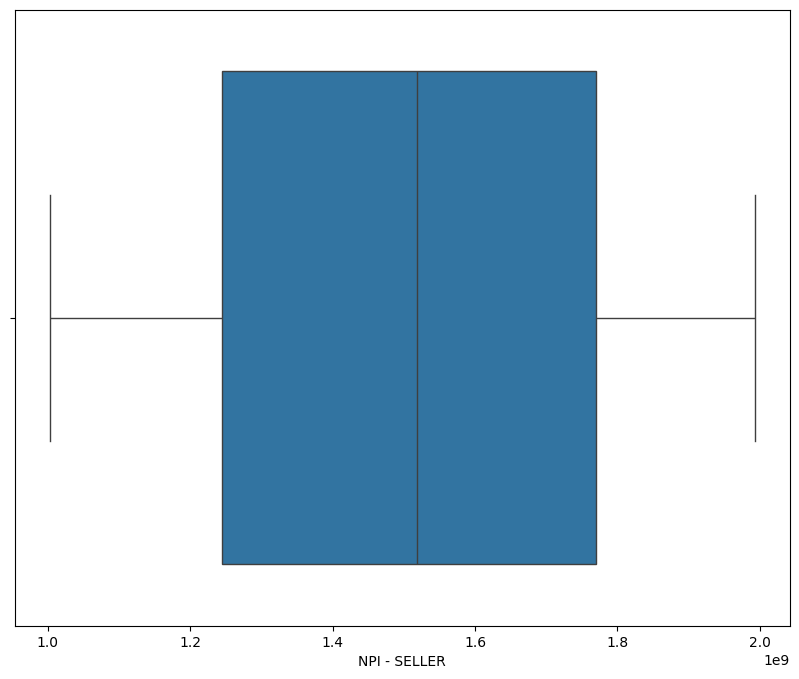

In [27]:
#5
import seaborn as sns
import matplotlib.pyplot as plt
#boxplot for numeric variable - NPI - SELLER
sns.boxplot(data=df, x='NPI - SELLER')

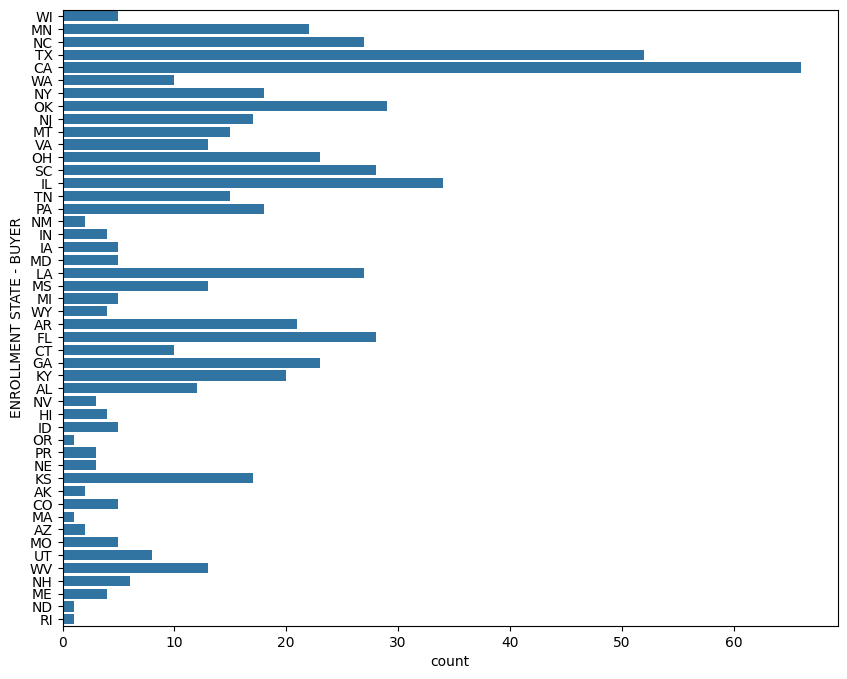

In [28]:
#bar graph for categorical variable - ENROLLMENT STATE - BUYER
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='ENROLLMENT STATE - BUYER')
plt.show()

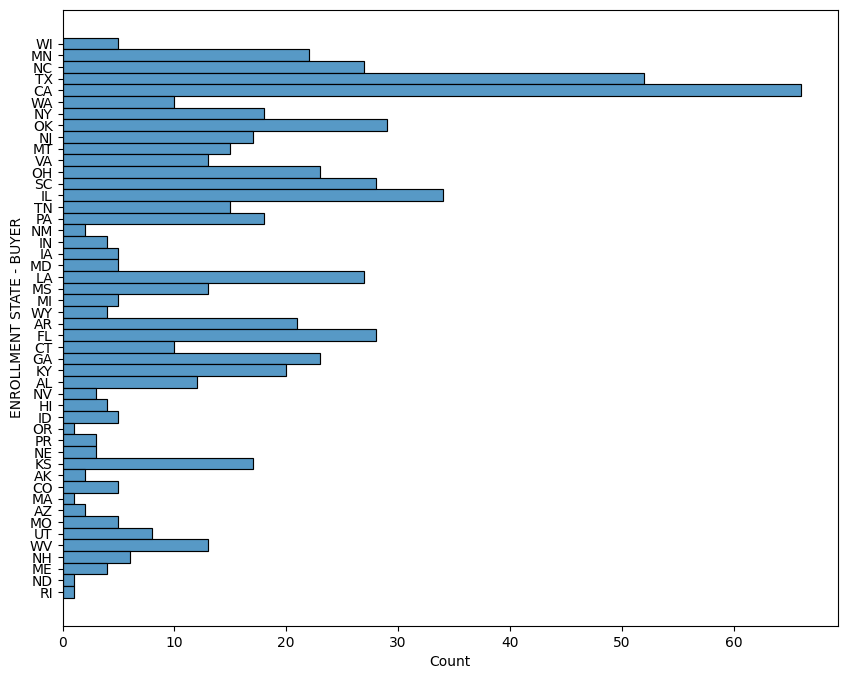

In [29]:
#6
#histogram
plt.figure(figsize=(10, 8))
sns.histplot(data=df, y='ENROLLMENT STATE - BUYER')
plt.show()

<Axes: xlabel='Density', ylabel='NPI - SELLER'>

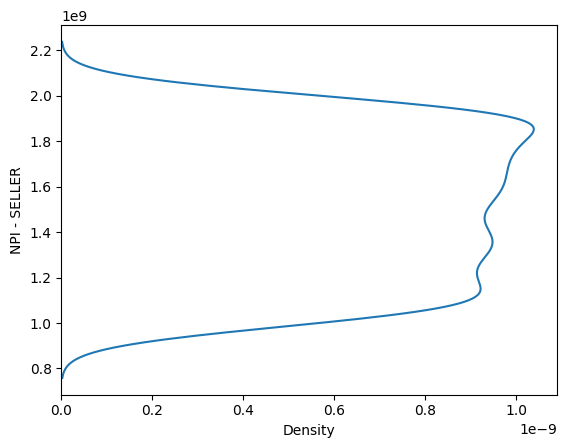

In [32]:
#kernel density plot
sns.kdeplot(data=df, y='NPI - SELLER')



> In the histogram, we can see that California has the most hospitals bought while Oregon, North Dakota, and Rhode Island have the least. In the kernel density plot, we can see that most NPI seller IDs are fairly consistent since the plot is uniform and smooth.

<Axes: xlabel='NPI - BUYER', ylabel='NPI - SELLER'>

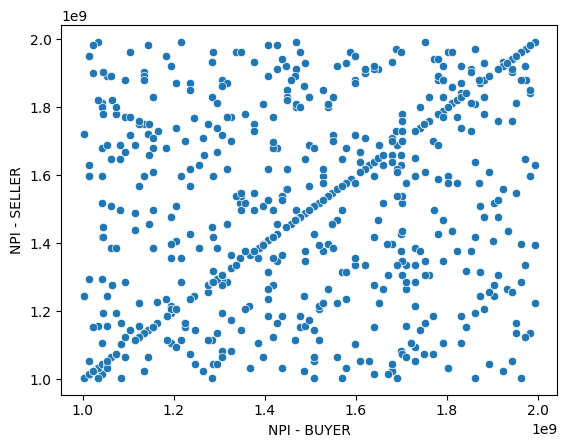

In [34]:
#7
#scatterplot
sns.scatterplot(data=df, x='NPI - BUYER', y='NPI - SELLER')



> There are clearly many outliers in the scatterplot between seller and buyer NPis. There is a linear trend in the middle of the plot but it is surrounded by many other points which suggests that there is not much linearity between the two NPIs.



In [35]:
#8
var = 'NPI - BUYER'
group = 'ENROLLMENT STATE - BUYER'
df.loc[:,[group,var]].groupby(group).describe()

NPI - BUYER                              \
                               count          mean           std   
ENROLLMENT STATE - BUYER                                           
AK                               2.0  1.528597e+09  2.429162e+08   
AL                              12.0  1.595772e+09  2.909772e+08   
AR                              21.0  1.490348e+09  3.072351e+08   
AZ                               2.0  1.735529e+09  4.895790e+07   
CA                              66.0  1.427064e+09  2.773615e+08   
CO                               5.0  1.524492e+09  3.289427e+08   
CT                              10.0  1.422232e+09  2.513013e+08   
FL                              28.0  1.529365e+09  2.880244e+08   
GA                              23.0  1.502454e+09  3.346995e+08   
HI                               4.0  1.518397e+09  4.179531e+08   
IA                               5.0  1.427342e+09  3.377568e+08   
ID                               5.0  1.661931e+09  3.357987e+08   
IL                              34.0  1.575610e+09  2.721128e+08   
IN                               4.0  1.515500e+09  3.865787e+08   
KS                              17.0  1.684492e+09  2.557854e+08   
KY                              20.0  1.424694e+09  2.711334e+08   
LA                              27.0  1.547809e+09  2.952306e+08   
MA                               1.0  1.023580e+09           NaN   
MD                               5.0  1.633079e+09  2.435660e+08   
ME                               4.0  1.697258e+09  2.755907e+08   
MI                               5.0  1.758510e+09  3.091967e+08   
MN                              22.0  1.485008e+09  2.534617e+08   
MO                               5.0  1.305841e+09  2.194002e+08   
MS                              13.0  1.547032e+09  3.023410e+08   
MT                              15.0  1.443486e+09  2.769980e+08   
NC                              27.0  1.533880e+09  3.095349e+08   
ND                               1.0  1.316570e+09           NaN   
NE                               3.0  1.195307e+09  1.919753e+08   
NH                               6.0  1.610798e+09  2.977132e+08   
NJ                              17.0  1.545608e+09  2.505964e+08   
NM                               2.0  1.321296e+09  1.495701e+08   
NV                               3.0  1.319893e+09  3.580996e+08   
NY                              18.0  1.521485e+09  3.369172e+08   
OH                              23.0  1.456428e+09  2.625242e+08   
OK                              29.0  1.388491e+09  3.236377e+08   
OR                               1.0  1.730629e+09           NaN   
PA                              18.0  1.347509e+09  2.209113e+08   
PR                               3.0  1.484583e+09  2.175875e+08   
RI                               1.0  1.043818e+09           NaN   
SC                              28.0  1.472774e+09  2.599174e+08   
TN                              15.0  1.505951e+09  3.010499e+08   
TX                              52.0  1.511245e+09  2.806056e+08   
UT                               8.0  1.443966e+09  3.258091e+08   
VA                              13.0  1.504870e+09  3.389208e+08   
WA                              10.0  1.477621e+09  2.425716e+08   
WI                               5.0  1.645343e+09  1.622366e+08   
WV                              13.0  1.438062e+09  2.901940e+08   
WY                               4.0  1.490358e+09  2.814991e+08   

                                                                    \
                                   min           25%           50%   
ENROLLMENT STATE - BUYER                                             
AK                        1.356829e+09  1.442713e+09  1.528597e+09   
AL                        1.144695e+09  1.389702e+09  1.715069e+09   
AR                        1.013092e+09  1.194725e+09  1.477040e+09   
AZ                        1.700910e+09  1.718219e+09  1.735529e+09   
CA                        1.013514e+09  1.136718e+09  1.457707e+09



> There are some missing values in some state's standard deviation which could be because the NPIs are so small that is it hard to calculate differences. We can see that California has the highest count of hospital data and Missouri has the highest mean NPI.

